**image处理方法**  
_2021.11.06_

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [10., 6.]

# `plt.imshow()`将数据转化为image  
[官方文档](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

## 基本原理  
* `plt.show()`函数的功能：将*二维数组*或*RGB(A)数据*转换成*pseudocolorimage (伪彩色图)*  
* 输入的数组类型
    1. (M, N)型二维数组，image与数组的堆叠形状完全相同，数值对应颜色
    2. (M, N, 3)型3维数组(RGB data)，第3维对应RGB (0-1 float or 0-255 int)
    3. (M, N, 4)型3维数组(RGBA data)

In [112]:
ar = np.array(
    [
        [1, 1, 1], 
        [1, 1, 1],
        [1, 0, 1]
    ]
)
print("生成一个只有第2行，第1列不同的二维数组")
ar

生成一个只有第2行，第1列不同的二维数组


array([[1, 1, 1],
       [1, 1, 1],
       [1, 0, 1]])

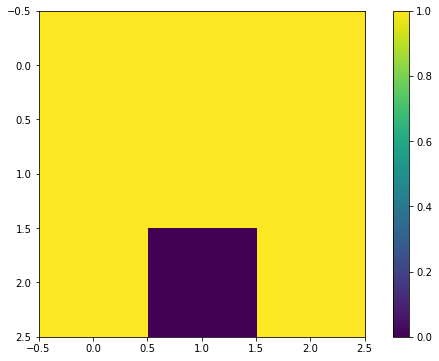

In [113]:
plt.imshow(ar) # * 由此可见image与二维数组的形状完全对应
plt.colorbar()

## `cmap`参数：指定渐变色
[colormap样式](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [114]:
np.random.seed(1)
data = np.random.rand(25).reshape(5, 5)
data

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01],
       [9.23385948e-02, 1.86260211e-01, 3.45560727e-01, 3.96767474e-01,
        5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01, 2.04452250e-01, 8.78117436e-01,
        2.73875932e-02],
       [6.70467510e-01, 4.17304802e-01, 5.58689828e-01, 1.40386939e-01,
        1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
        8.76389152e-01]])

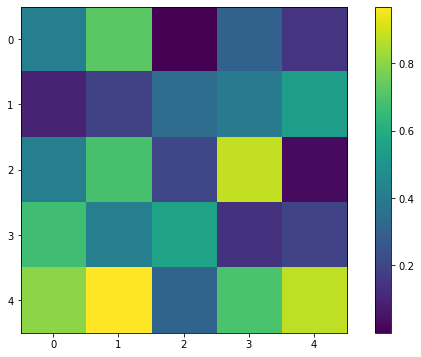

In [115]:
plt.imshow(data)
plt.colorbar()

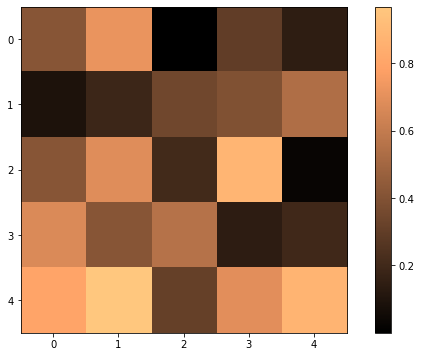

In [116]:
plt.imshow(data, cmap='copper') # * 指定颜色渐变colormap
plt.colorbar()

## `aspect`参数：指定pixel大小  
* 默认：aspect='equal'，即pixel为小方块
* aspect='auto'，则会根据figsize自动调整piexl大小


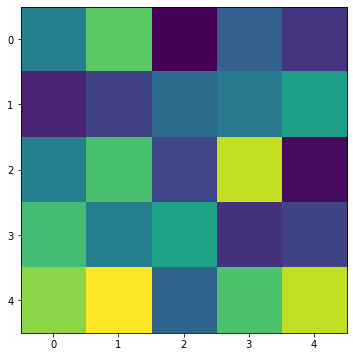

In [117]:
plt.imshow(data)

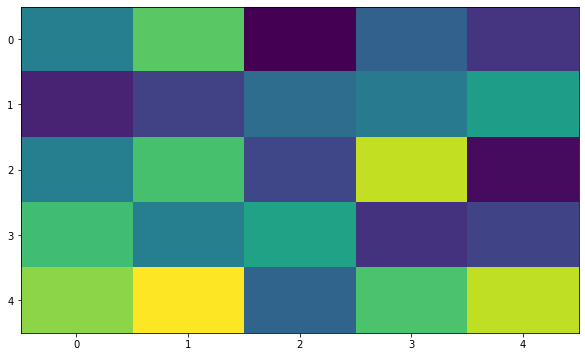

In [118]:
plt.imshow(data, aspect='auto')

## `alpha`参数：指定透明度

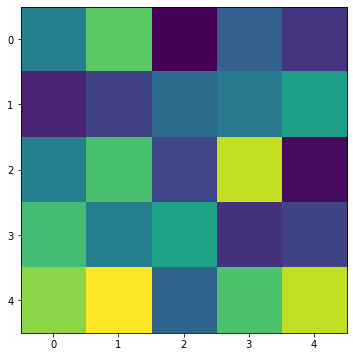

In [119]:
plt.imshow(data)

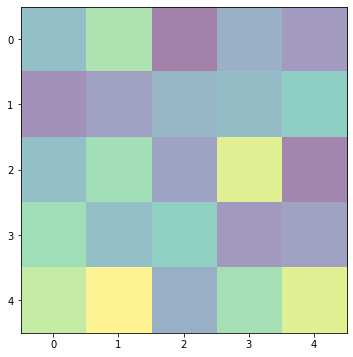

In [120]:
plt.imshow(data, alpha=0.5)

## `origin`参数：调整数组与image的映射方向 
* upper默认：(0, 0)在左上角
* lower: (0, 0)在左下角

In [121]:
data = np.array(
    [
        [2, 1, 1],
        [1, 1, 1],
        [1, 1, 0]
    ]
)
data

array([[2, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

方块的中心坐标与数组的索引对应。例如：数组中的0的索引是[2][2]，对应紫色方块的坐标也是(2, 2)


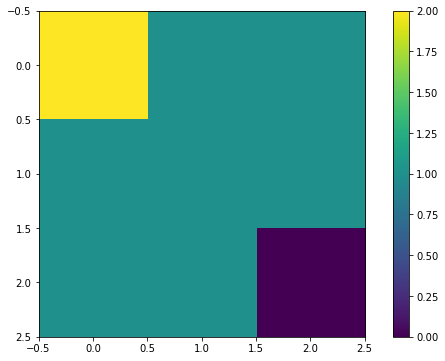

In [122]:
plt.imshow(data) # * 默认方向与数组完全对应
plt.colorbar()
print('方块的中心坐标与数组的索引对应。例如：数组中的0的索引是[2][2]，对应紫色方块的坐标也是(2, 2)')

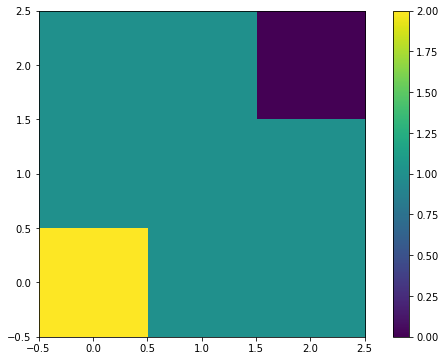

In [123]:
plt.imshow(data, origin='lower')
plt.colorbar()

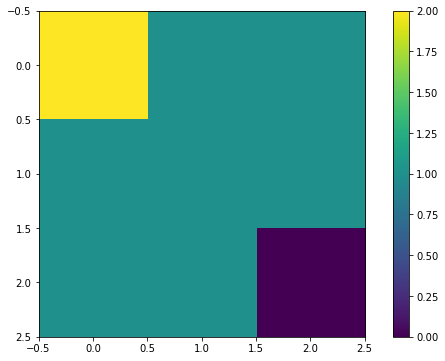

In [124]:
plt.imshow(data, origin='upper')
plt.colorbar()

## `vmin & vmax`参数：部分映射  
只映射区间范围内的值，低于下限的按下限映射，高于上限的按上限映射

In [125]:
data = np.array(
    [
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5]
    ]
)

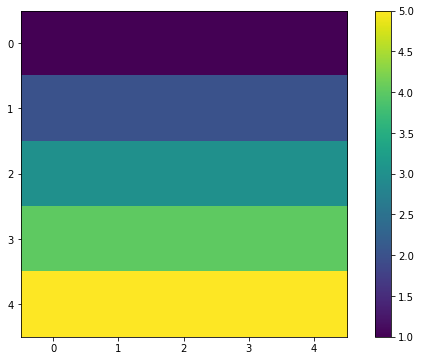

In [126]:
plt.imshow(data)
plt.colorbar()

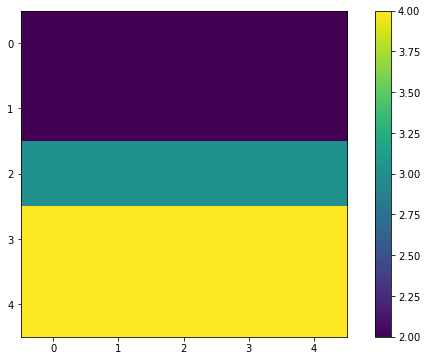

In [127]:
plt.imshow(data, vmin=2, vmax=4)
plt.colorbar()

## `interpolation`参数：设置边界的差值方法

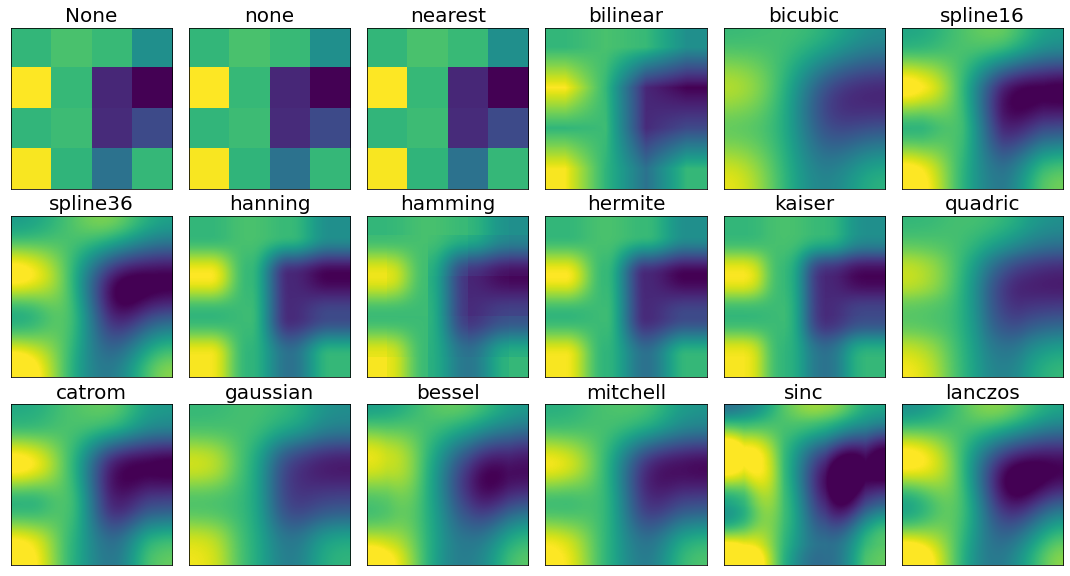

In [139]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(15, 8),facecolor = 'w',
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method), fontsize=20)

plt.tight_layout()
plt.show()

## `extent`参数：暂不清楚

In [149]:
np.random.seed(1)
data = np.random.randint(0, 10, (10, 10))
data

array([[5, 8, 9, 5, 0, 0, 1, 7, 6, 9],
       [2, 4, 5, 2, 4, 2, 4, 7, 7, 9],
       [1, 7, 0, 6, 9, 9, 7, 6, 9, 1],
       [0, 1, 8, 8, 3, 9, 8, 7, 3, 6],
       [5, 1, 9, 3, 4, 8, 1, 4, 0, 3],
       [9, 2, 0, 4, 9, 2, 7, 7, 9, 8],
       [6, 9, 3, 7, 7, 4, 5, 9, 3, 6],
       [8, 0, 2, 7, 7, 9, 7, 3, 0, 8],
       [7, 7, 1, 1, 3, 0, 8, 6, 4, 5],
       [6, 2, 5, 7, 8, 4, 4, 7, 7, 4]])

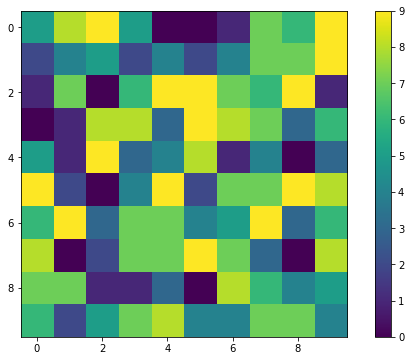

In [151]:
plt.imshow(data)
plt.colorbar()

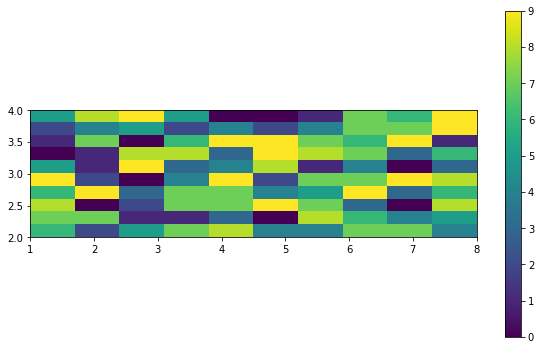

In [153]:
plt.imshow(data, extent=(1, 8, 2, 4))
plt.colorbar()

# 图片裁切

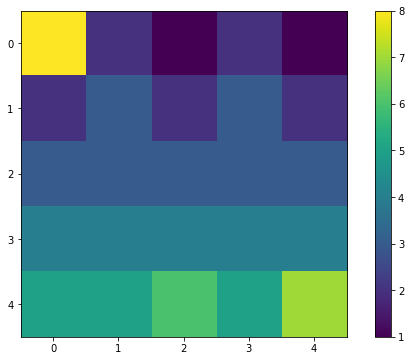

In [160]:
data = np.array(
    [
        [8, 2, 1, 2, 1],
        [2, 3, 2, 3, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 6, 5, 7]
    ]
)
plt.imshow(data)
plt.colorbar()

In [163]:
data_sub = data[1:4, 1:5]
data_sub

array([[3, 2, 3, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

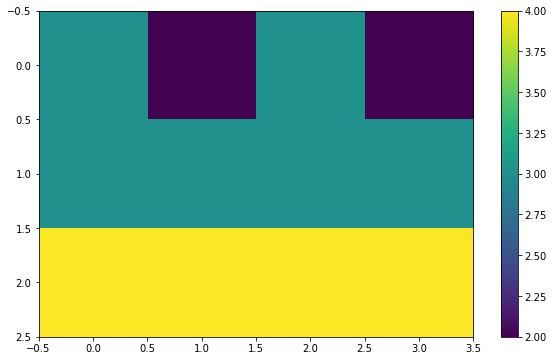

In [166]:
plt.imshow(data_sub)
plt.colorbar()

# 图片旋转  
* 通过`转置`+`origin='lower'`实现逆时针转90度

In [169]:
data

array([[8, 2, 1, 2, 1],
       [2, 3, 2, 3, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 6, 5, 7]])

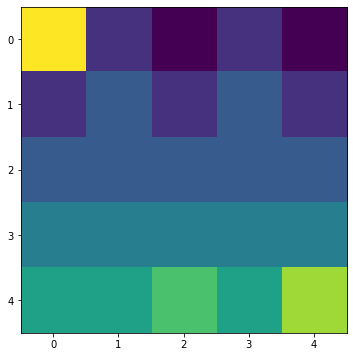

In [172]:
plt.imshow(data)

In [170]:
data.T

array([[8, 2, 3, 4, 5],
       [2, 3, 3, 4, 5],
       [1, 2, 3, 4, 6],
       [2, 3, 3, 4, 5],
       [1, 2, 3, 4, 7]])

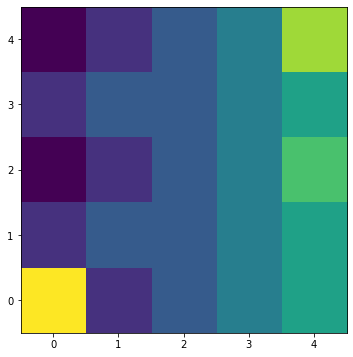

In [174]:
plt.imshow(data.T, origin='lower')